In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset Análisis del mercado Inmobiliario en Bogotá
#Link de Descarga del Dataset "https://www.kaggle.com/datasets/pablobravo73/real-estate-bogota"

df =pd.read_csv("/content/inmuebles_bogota.csv")
df


,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000
...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000


In [124]:
columnas = {'Baños': 'Banos', 'Área': 'Area'}
df = df.rename(columns=columnas)
df.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
4115,Casa,Casa en venta en Villa Maria,5,4,222,Villa Maria,El Rincón,$ 437.000.000
7472,Apartamento,Apartamento en venta en Kennedy,3,1,42,Kennedy,Kennedy Central,$ 133.000.000
2422,Apartamento,Apartamento en venta en San Patricio,1,1,47,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 430.000.000
3980,Apartamento,Apartamento en venta en San Patricio,3,3,125,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 1.000.000.000
4930,Casa,Casa en venta en Antonio Nariño,5,4,364,Antonio Nariño,Restrepo,$ 750.000.000
6233,Apartamento,Apartamento en venta en Chapinero Central,1,1,36,Chapinero Central,Localidad Chapinero resto,$ 203.823.000
588,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,106,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 491.000.000
6874,Casa,Casa en venta en Kennedy,6,3,230,Kennedy,Kennedy Central,$ 1.100.000.000
8507,Apartamento,Apartamento en venta en Usaquén,3,2,55,Usaquén,Usaquén,$ 160.000.000
6502,Apartamento,Apartamento en venta en Bella Suiza,3,3,200,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 830.000.000


# EDA- Análisis Exploratorio de Datos


In [125]:
df.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Banos', 'Area', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

In [126]:
df.head(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000
5,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000
6,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 500.000.000
7,Apartamento,Apartamento en venta en Bella Suiza,3,4,212,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 2.350.000.000
8,Apartamento,Apartamento en venta en El Chicó,3,2,159,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000
9,Apartamento,Apartamento en venta en Bella Suiza,2,2,80,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 642.000.000


In [127]:
df.iloc[200]

,200
Tipo,Apartamento
Descripcion,Apartamento en venta en El Contador
Habitaciones,3
Banos,3
Area,90
Barrio,El Contador
UPZ,Los Cedros
Valor,$ 460.000.000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [129]:
df.describe()

,Habitaciones,Banos,Area
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


In [130]:
df.Area.mean()

np.float64(146.66470588235293)

In [131]:
df.Barrio.value_counts().head(10)

,count
Barrio,
Usaquén,1105
Zona Noroccidental,877
Kennedy,589
Bosa,589
Cedritos,554
Barrios Unidos,473
Engativa,462
Suba,443
Santa Barbara,438


In [132]:
display(df['Tipo'].value_counts())

,count
Tipo,
Apartamento,7327
Casa,2043
Oficina/Consultorio,60
Local,38
Edificio,22
Bodega,13
Finca,11
Lote,6


In [133]:
display(df[['Tipo', 'Descripcion', 'Barrio', 'UPZ' ]].describe())

,Tipo,Descripcion,Barrio,UPZ
count,9520,9520,9520,9478
unique,8,316,149,63
top,Apartamento,Apartamento en venta en Usaquén,Usaquén,Usaquén
freq,7327,916,1105,1681


In [134]:
df.UPZ.value_counts()

,count
UPZ,
Usaquén,1681
CHAPINERO: Pardo Rubio + Chapinero,1274
USAQUÉN: Country Club + Santa Bárbara,771
Bosa Central,591
Kennedy Central,589
...,...
San José,2
Localidad Usme resto,2
Fontibón San Pablo,1


In [135]:
df.isnull().sum()

,0
Tipo,0
Descripcion,0
Habitaciones,0
Banos,0
Area,0
Barrio,0
UPZ,42
Valor,0


In [136]:
pct_nulos = df.isnull().mean() *100
pct_nulos

,0
Tipo,0.000000
Descripcion,0.000000
Habitaciones,0.000000
Banos,0.000000
Area,0.000000
Barrio,0.000000
UPZ,0.441176
Valor,0.000000


## Análisis Univariado

In [137]:
df["Habitaciones"].value_counts()

,count
Habitaciones,
3,4937
2,2062
4,872
1,841
5,309
6,134
7,87
8,77
10,62


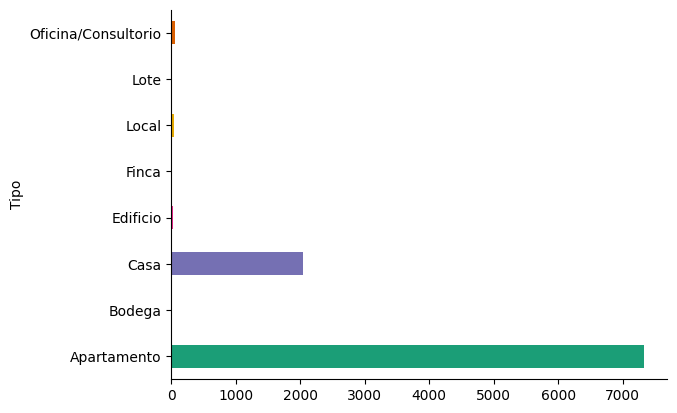

In [138]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Tipo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: ylabel='Habitaciones'>

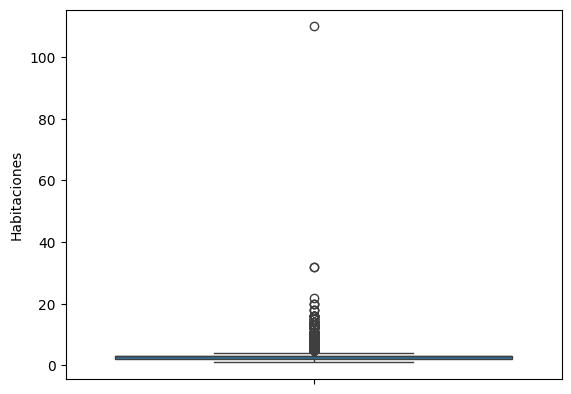

In [139]:
#Gráfica de valores outliers

sns.boxplot(df["Habitaciones"])

<Axes: xlabel='Area'>

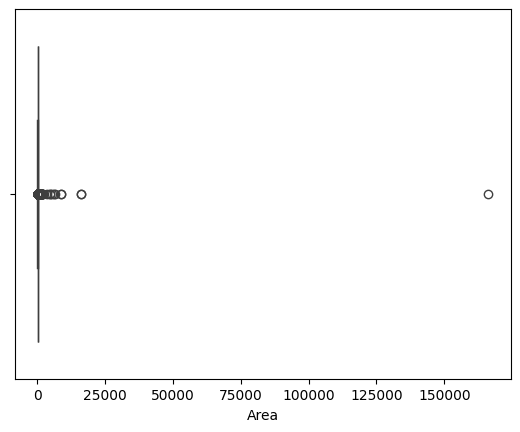

In [140]:

sns.boxplot(x=df["Area"])

<Axes: xlabel='Banos'>

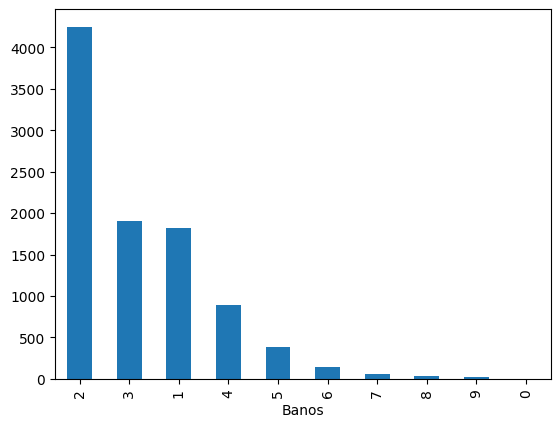

In [141]:
df["Banos"].value_counts().plot (kind="bar")

<Axes: xlabel='Habitaciones'>

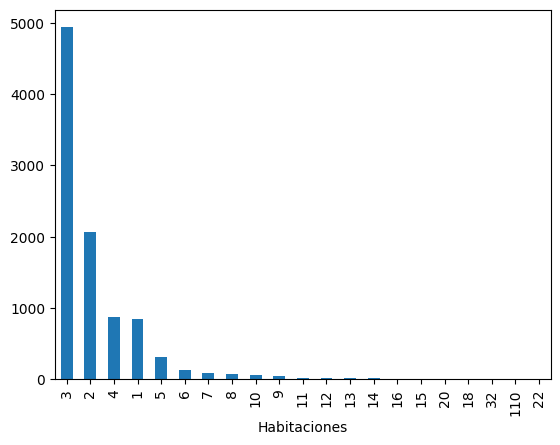

In [142]:
df["Habitaciones"].value_counts().plot (kind="bar")

<Axes: xlabel='Valor', ylabel='Count'>

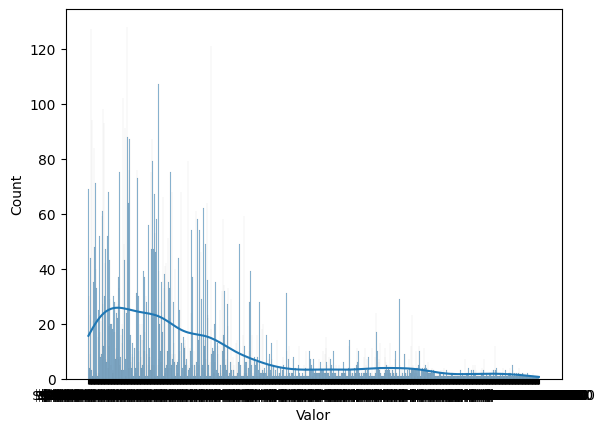

In [143]:
sns.histplot(df["Valor"], kde=True)

,Habitaciones,Banos,Area
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


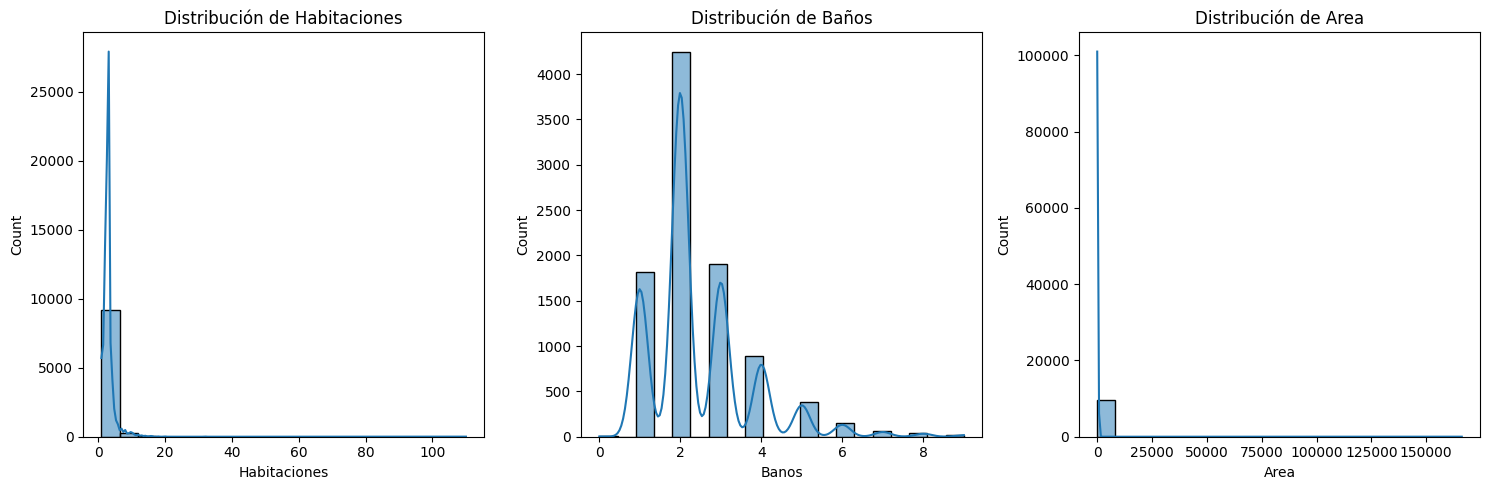

In [144]:
#Distribución de Habitaciones, Baños y Área

if df is not None:
    display(df[['Habitaciones', 'Banos', 'Area']].describe())

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(df['Habitaciones'], kde=True, bins=20)
    plt.title('Distribución de Habitaciones')

    plt.subplot(1, 3, 2)
    sns.histplot(df['Banos'], kde=True, bins=20)
    plt.title('Distribución de Baños')

    plt.subplot(1, 3, 3)
    sns.histplot(df['Area'], kde=True, bins=20)
    plt.title('Distribución de Area')

    plt.tight_layout()
    plt.show()

## Análisis Bivariado

In [145]:
if df is not None:
    # Eliminar '$' y '.' y convertir a numérico
    df.loc[:, 'Valor'] = df['Valor'].astype(str).str.replace('[$.]', '', regex=True)
    df.loc[:, 'Valor'] = pd.to_numeric(df['Valor'])

    display(df.head())
    display(df.info())

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360000000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,670000000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1120000000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,890000000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,970000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


None

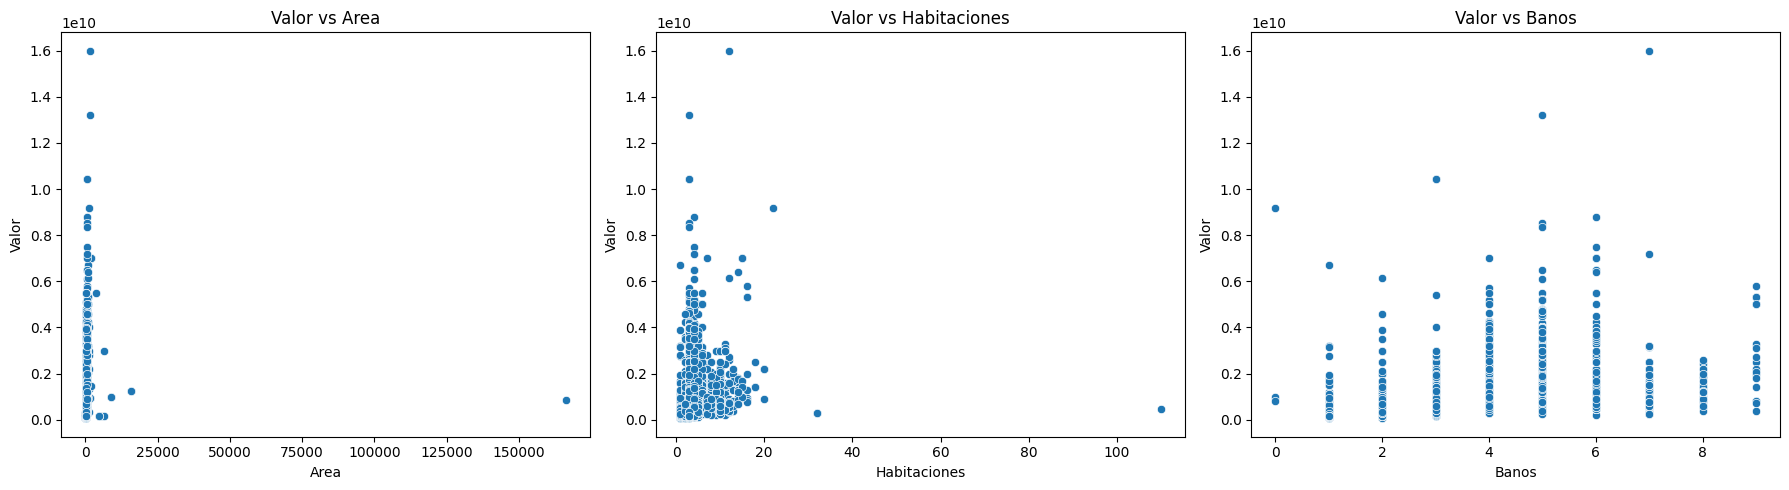

In [146]:
# Relación entre valor y Características de la Propiedad
# --> Relación entre el valor de la propiedad y el area, número de habitaciones y número de baños
if df is not None:
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    sns.scatterplot(x='Area', y='Valor', data=df)
    plt.title('Valor vs Area')

    plt.subplot(1, 3, 2)
    sns.scatterplot(x='Habitaciones', y='Valor', data=df)
    plt.title('Valor vs Habitaciones')

    plt.subplot(1, 3, 3)
    sns.scatterplot(x='Banos', y='Valor', data=df)
    plt.title('Valor vs Banos')

    plt.tight_layout()
    plt.show()

,count
Barrio,
Usaquén,1105
Zona Noroccidental,877
Kennedy,589
Bosa,589
Cedritos,554
Barrios Unidos,473
Engativa,462
Suba,443
Santa Barbara,438


/tmp/ipython-input-600274594.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=barrio_counts.head(10).index, x=barrio_counts.head(10).values, palette='viridis')


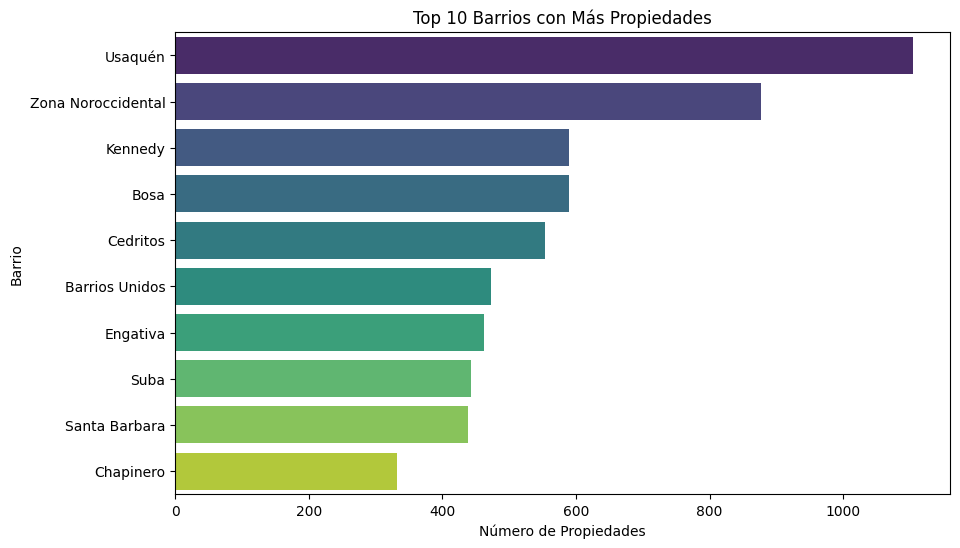

In [147]:
#Análisis por barrio y UPZ

if df is not None:
    barrio_counts = df['Barrio'].value_counts()
    display(barrio_counts.head(10))

    plt.figure(figsize=(10, 6))
    sns.barplot(y=barrio_counts.head(10).index, x=barrio_counts.head(10).values, palette='viridis')
    plt.title('Top 10 Barrios con Más Propiedades')
    plt.xlabel('Número de Propiedades')
    plt.ylabel('Barrio')
    plt.show()

,Valor
Barrio,
Santa Ana,3172500000.0
La Candelaria,1544228125.0
El Retiro,1528421052.631579
Los Rosales,1479646510.0
Quinta Camacho,1449215772.952381
El Chicó,1393410958.904109
Cerros De Suba,1315000000.0
Chico Navarra,1292083333.333333
El Refugio,1231625000.0


/tmp/ipython-input-1682545689.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=barrio_avg_value.head(10).index, x=barrio_avg_value.head(10).values, palette='viridis')


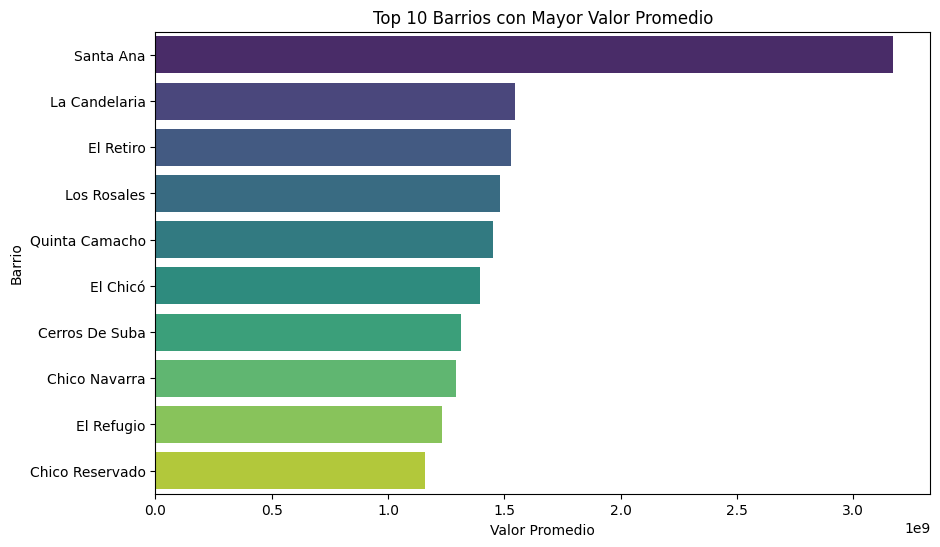

In [148]:
#Valor promedio de la propiedad por barrio

if df is not None:
    barrio_avg_value = df.groupby('Barrio')['Valor'].mean().sort_values(ascending=False)
    display(barrio_avg_value.head(10))

    plt.figure(figsize=(10, 6))
    sns.barplot(y=barrio_avg_value.head(10).index, x=barrio_avg_value.head(10).values, palette='viridis')
    plt.title('Top 10 Barrios con Mayor Valor Promedio')
    plt.xlabel('Valor Promedio')
    plt.ylabel('Barrio')
    plt.show()

In [149]:
#Número de propiedades y el valor promedio por UPZ

if df is not None:
    upz_analysis = df.groupby('UPZ').agg(property_count=('Tipo', 'count'), average_value=('Valor', 'mean')).reset_index()
    display(upz_analysis.head())
    display(upz_analysis.sort_values(by='property_count', ascending=False).head(10))
    display(upz_analysis.sort_values(by='average_value', ascending=False).head(10))

,UPZ,property_count,average_value
0,Arborizadora,28,309732142.821429
1,Bolivia,18,297500000.0
2,Bosa Central,591,159628697.959391
3,Bosa Occidental,6,724333333.333333
4,Boyacá Real,21,449785714.285714


,UPZ,property_count,average_value
59,Usaquén,1681,678339320.892921
7,CHAPINERO: Pardo Rubio + Chapinero,1274,755539634.635793
57,USAQUÉN: Country Club + Santa Bárbara,771,769916166.376135
2,Bosa Central,591,159628697.959391
24,Kennedy Central,589,353079200.188455
6,CHAPINERO: Chicó Lago + El Refugio,557,1255291272.098743
35,Los Andes,473,549424445.460888
17,Engativá,468,373115769.726496
52,Suba,467,589056830.882227
18,Fontibón,328,390820853.658537


,UPZ,property_count,average_value
26,La Candelaria,40,1286832500.0
6,CHAPINERO: Chicó Lago + El Refugio,557,1255291272.098743
37,Lucero,4,1137500000.0
13,Comuneros,6,931666666.666667
9,Casa Blanca Suba,2,852500000.0
50,Santa Isabel,8,826250000.0
12,Ciudad Salitre Oriental,60,823050000.0
57,USAQUÉN: Country Club + Santa Bárbara,771,769916166.376135
7,CHAPINERO: Pardo Rubio + Chapinero,1274,755539634.635793
3,Bosa Occidental,6,724333333.333333


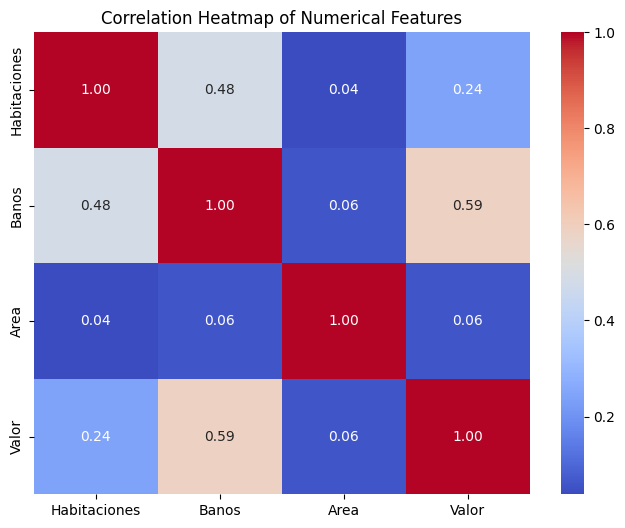

In [150]:
if df is not None:
    # Select only the numerical columns for correlation analysis
    numerical_df = df[['Habitaciones', 'Banos', 'Area', 'Valor']]

    # Calculate the correlation matrix
    corr_matrix = numerical_df.corr()

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

**Análisis del Mapa de Calor**

En este mapa de calor podemos observar que:

*   Existe una **correlación positiva moderada entre "Valor" y "Baños" (0.59)**. Esto sugiere que, en general, las propiedades con más baños tienden a tener un valor más alto.
*   Existe una **correlación positiva débil entre "Valor" y "Habitaciones" (0.24)**. Aunque hay una relación, no es tan fuerte como con los baños.
*   La **correlación entre "Valor" y "Área" es muy débil (0.06)**. Esto podría ser sorprendente, pero recordemos que hay valores atípicos extremos en la columna "Área" que pueden estar afectando esta correlación.
*   También hay **correlación positiva moderada entre "Habitaciones" y "Baños" (0.48)**, lo cual es esperado ya que propiedades más grandes con más habitaciones suelen tener más baños.

En resumen, el número de baños parece ser el factor numérico con la correlación lineal más fuerte con el valor de la propiedad, seguido por el número de habitaciones. La relación con el área es menos clara linealmente, posiblemente debido a los valores atípicos.

/tmp/ipython-input-941252780.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Valor', y='Barrio', data=df_top_barrios, palette='viridis')


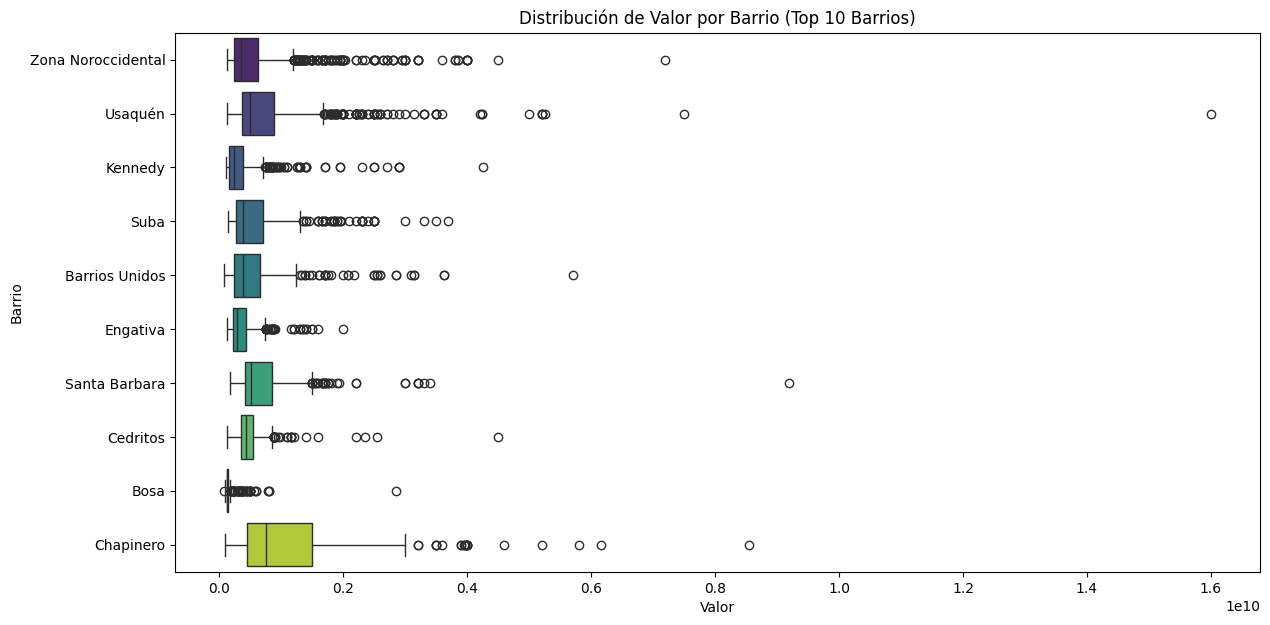

In [151]:
if df is not None:
    # Select the top N barrios by number of properties for the boxplot to avoid too many categories
    top_barrios = df['Barrio'].value_counts().head(10).index.tolist()
    df_top_barrios = df[df['Barrio'].isin(top_barrios)]

    # Create a boxplot of Valor by Barrio for the top barrios
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Valor', y='Barrio', data=df_top_barrios, palette='viridis')
    plt.title('Distribución de Valor por Barrio (Top 10 Barrios)')
    plt.xlabel('Valor')
    plt.ylabel('Barrio')
    plt.show()

## Tablas cruzadas

In [152]:
if df is not None:
    # Create a cross-tabulation between 'Tipo' and 'Barrio'
    crosstab_tipo_barrio = pd.crosstab(df['Tipo'], df['Barrio'])
    print("Tabla Cruzada: Tipo de Propiedad vs Barrio")
    display(crosstab_tipo_barrio)

    # Create a cross-tabulation between 'Tipo' and 'UPZ'
    # Dropping NaN values in 'UPZ' for crosstabulation
    crosstab_tipo_upz = pd.crosstab(df['Tipo'], df['UPZ'])
    print("\nTabla Cruzada: Tipo de Propiedad vs UPZ")
    display(crosstab_tipo_upz)

Tabla Cruzada: Tipo de Propiedad vs Barrio


Barrio,Alameda,Alhambra,Andes Norte,Antonio Nariño,Barrancas,Barrios Unidos,Bella Suiza,Bellavista Occidental,Bochica,Bogotá D.C,...,Usme,Venecia,Veraguas,Verbenal,Villa Alsacia,Villa Maria,Villas De Granada,Villemar,Zona Franca,Zona Noroccidental
Tipo,,,,,,,,,,,,,,,,,,,,,
Apartamento,1,9,5,28,15,314,96,0,3,12,...,35,2,2,6,25,1,16,16,0,635
Bodega,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Casa,0,8,2,20,0,143,5,5,0,2,...,16,2,0,0,10,12,5,2,1,233
Edificio,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
Finca,0,0,0,0,0,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Local,0,0,0,0,0,5,0,0,0,0,...,0,0,3,0,0,0,0,0,0,2
Lote,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Oficina/Consultorio,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5



Tabla Cruzada: Tipo de Propiedad vs UPZ


UPZ,Arborizadora,Bolivia,Bosa Central,Bosa Occidental,Boyacá Real,Britalia,CHAPINERO: Chicó Lago + El Refugio,CHAPINERO: Pardo Rubio + Chapinero,CIUDAD BOLÍVAR: Monteblanco + El Tesoro + El Mochuelo,Casa Blanca Suba,...,Teusaquillo,Timiza,Tintala,Tunjuelito,USAQUÉN: Country Club + Santa Bárbara,USME: Alfonso López + Ciudad Usme,Usaquén,Venecia,Verbenal,Zona Franca
Tipo,,,,,,,,,,,,,,,,,,,,,
Apartamento,13,15,499,0,11,102,516,982,78,1,...,210,1,76,12,692,35,1433,3,6,0
Bodega,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,3,0,0,0,0,0
Casa,15,2,92,4,10,10,17,272,23,1,...,65,2,36,17,63,16,238,2,0,1
Edificio,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
Finca,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,2,0,0,0,0,0
Local,0,0,0,2,0,0,6,7,0,0,...,1,0,0,0,0,0,1,0,0,0
Lote,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Oficina/Consultorio,0,0,0,0,0,0,18,11,0,0,...,0,0,0,0,10,0,7,0,0,0


## 7. Conclusiones y Resumen
Aquí se presenta un resumen de los hallazgos clave del Análisis Exploratorio de Datos:

* **Distribución de Propiedades:** La mayoría de las propiedades en el conjunto de datos son apartamentos, seguidos por casas. Hay una menor cantidad de otros tipos de propiedades como oficinas, locales y bodegas.
* **Características Numéricas:** La mayoría de las propiedades tienen entre 2 y 4 habitaciones y 2 a 3 baños. La distribución del área muestra una concentración en áreas más pequeñas, con algunas propiedades con áreas significativamente grandes (posibles valores atípicos).
* **Relación Valor-Características:** Existe una tendencia general de mayor valor con mayor área, número de habitaciones y número de baños, aunque con una dispersión considerable, lo que sugiere que otros factores también influyen en el valor.
* **Análisis Geográfico:** Algunos barrios y UPZ concentran una mayor cantidad de propiedades, mientras que otros presentan valores promedio de venta significativamente más altos, lo que indica diferencias en el mercado inmobiliario por ubicación.

Estos hallazgos iniciales nos dan una buena comprensión del conjunto de datos y pueden servir como base para análisis más profundos o modelado predictivo.

**Conclusión de las Tablas Cruzadas**

Basado en las tablas cruzadas de Tipo de Propiedad vs Barrio y Tipo de Propiedad vs UPZ, podemos concluir lo siguiente:

*   **Dominio de Apartamentos:** Como ya habíamos observado, los apartamentos son el tipo de propiedad más frecuente en la gran mayoría de los barrios y UPZs.
*   **Distribución de Casas:** Las casas, aunque menos numerosas que los apartamentos en general, tienen una presencia significativa en varios barrios y UPZs. Algunas áreas pueden tener una proporción más alta de casas en comparación con otras.
*   **Concentración de Otros Tipos:** Otros tipos de propiedades como oficinas, locales, edificios, bodegas, fincas y lotes son mucho menos comunes y tienden a concentrarse en barrios o UPZs específicas, probablemente aquellas con un uso de suelo más comercial o industrial, o en las afueras de la ciudad para el caso de fincas y lotes.
*   **Variabilidad Geográfica:** Las tablas cruzadas resaltan la variabilidad en la composición del mercado inmobiliario a nivel geográfico. Algunos barrios o UPZs pueden ser predominantemente residenciales (apartamentos y casas), mientras que otros pueden tener una mezcla mayor de tipos de propiedades.

En resumen, las tablas cruzadas confirman la predominancia de apartamentos y casas en el mercado de Bogotá y muestran cómo la distribución de los diferentes tipos de propiedades varía significativamente entre barrios y UPZs, reflejando las características y el uso de suelo de cada zona.

## Limpieza de Datos

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, classification_report
import statsmodels.api as sm

In [154]:
df = pd.read_csv("/content/inmuebles_bogota.csv")
df

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000
...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000


In [155]:
df.head(5)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [157]:
duplicados = df.duplicated().sum()
duplicados

np.int64(3575)

In [158]:
duplicados_columnas = df[df.duplicated()]
duplicados_columnas

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
56,Apartamento,Apartamento en venta en Usaquén,2,2,80,Usaquén,Usaquén,$ 349.000.000
61,Apartamento,Apartamento en venta en Usaquén,3,3,66,Usaquén,Usaquén,$ 261.500.000
63,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 278.000.000
64,Apartamento,Apartamento en venta en Engativa,3,2,60,Engativa,Engativá,$ 258.000.000
65,Apartamento,Apartamento en venta en Fontibón,3,3,87,Fontibón,Fontibón,$ 520.000.000
...,...,...,...,...,...,...,...,...
9446,Apartamento,Apartamento en venta en Kennedy,3,1,47,Kennedy,Kennedy Central,$ 140.000.000
9453,Casa,Casa en venta en Fontibón,5,4,165,Fontibón,Fontibón,$ 790.000.000
9457,Apartamento,Apartamento en venta en Suba,3,3,131,Suba,Suba,$ 700.000.000
9462,Casa,Casa en venta en Kennedy,10,3,139,Kennedy,Kennedy Central,$ 500.000.000


In [159]:
nulos = df.isnull().sum()
nulos

,0
Tipo,0
Descripcion,0
Habitaciones,0
Baños,0
Área,0
Barrio,0
UPZ,42
Valor,0


In [160]:
pct_nulos =df.isnull().mean()*100
pct_nulos

,0
Tipo,0.000000
Descripcion,0.000000
Habitaciones,0.000000
Baños,0.000000
Área,0.000000
Barrio,0.000000
UPZ,0.441176
Valor,0.000000


## Imputación de Datos

In [161]:
df_copy = df.copy()

In [162]:
df_copy.head(10)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000
5,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000
6,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 500.000.000
7,Apartamento,Apartamento en venta en Bella Suiza,3,4,212,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 2.350.000.000
8,Apartamento,Apartamento en venta en El Chicó,3,2,159,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000
9,Apartamento,Apartamento en venta en Bella Suiza,2,2,80,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 642.000.000


In [163]:
#Rellenar nulos
df_copy["UPZ"]= df_copy["UPZ"].fillna(df_copy["UPZ"].mode()[0])
df_copy

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000
...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000


In [164]:
nulos = df_copy.isnull().sum()
nulos

,0
Tipo,0
Descripcion,0
Habitaciones,0
Baños,0
Área,0
Barrio,0
UPZ,0
Valor,0


In [165]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9520 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


## Tratamiento de Outliers


In [166]:
# Limpiar la columna 'Valor' eliminando '$' y '.' y convertir a numérico
df_copy['Valor'] = df_copy['Valor'].astype(str).str.replace('[$.]', '', regex=True)
df_copy['Valor'] = pd.to_numeric(df_copy['Valor'])

# Calcular los cuartiles Q1 y Q3
Q1 = df_copy["Valor"].quantile(0.25)
Q3 = df_copy["Valor"].quantile(0.75)
IQR = Q3 - Q1

# Analizar los límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df_copy[(df_copy["Valor"] < limite_inferior) | (df_copy["Valor"] > limite_superior)]
outliers

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
7,Apartamento,Apartamento en venta en Bella Suiza,3,4,212,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,2350000000
15,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,2519000000
19,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,1600000000
22,Casa,Casa en venta en Zona Noroccidental,3,5,365,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,2799000000
23,Casa,Casa en venta en Zona Noroccidental,5,5,450,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,1450000000
...,...,...,...,...,...,...,...,...
9466,Local,Local en venta en Puente Aranda,15,9,114,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,1400000000
9480,Local,Local en venta en Las Delicias,9,7,495,Las Delicias,Usaquén,1500000000
9495,Apartamento,Apartamento en venta en Chapinero,4,4,366,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,3950000000
9506,Apartamento,Apartamento en venta en Chico Reservado,3,4,390,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,3200000000


In [167]:
# Calcular los cuartiles Q1 y Q3 para 'Area'
Q1_area = df_copy["Área"].quantile(0.25)
Q3_area = df_copy["Área"].quantile(0.75)
IQR_area = Q3_area - Q1_area

# Analizar los límites para 'Area'
limite_inferior_area = Q1_area - 1.5 * IQR_area
limite_superior_area = Q3_area + 1.5 * IQR_area

# Identificar los outliers en 'Area'
outliers_area = df_copy[(df_copy["Área"] < limite_inferior_area) | (df_copy["Área"] > limite_superior_area)]
outliers_area

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
15,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,2519000000
19,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,1600000000
22,Casa,Casa en venta en Zona Noroccidental,3,5,365,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,2799000000
23,Casa,Casa en venta en Zona Noroccidental,5,5,450,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,1450000000
24,Casa,Casa en venta en Zona Noroccidental,4,5,315,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,2000000000
...,...,...,...,...,...,...,...,...
9499,Casa,Casa en venta en Puente Aranda,7,3,295,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,780000000
9506,Apartamento,Apartamento en venta en Chico Reservado,3,4,390,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,3200000000
9512,Casa,Casa en venta en Kennedy,7,4,270,Kennedy,Kennedy Central,615000000
9513,Casa,Casa en venta en San Luis,14,6,594,San Luis,Galerías,1200000000


Basándonos en el análisis exploratorio de datos que hemos realizado, las columnas más importantes a tener en cuenta para el tratamiento de outliers son **'Area'** y **'Valor'**.

Hemos observado lo siguiente:

*   En los gráficos de caja (`boxplot`) y los histogramas, tanto 'Area' como 'Valor' muestran una dispersión significativa y la presencia de valores extremadamente altos que se alejan considerablemente de la mayoría de los datos.
*   Aunque 'Habitaciones' y 'Baños' también presentan algunos valores atípicos, la magnitud y el impacto potencial en el análisis y modelado posterior son menores en comparación con 'Area' y 'Valor'.
*   La débil correlación lineal entre 'Area' y 'Valor' (0.06) en el mapa de calor podría estar influenciada por la presencia de estos outliers extremos en 'Area'.

Tratar los outliers en 'Area' y 'Valor' es crucial porque estos valores extremos pueden distorsionar las estadísticas descriptivas, afectar la visualización de los datos y tener un impacto significativo en el rendimiento de los modelos de aprendizaje automático que se puedan construir posteriormente.

<Axes: ylabel='Valor'>

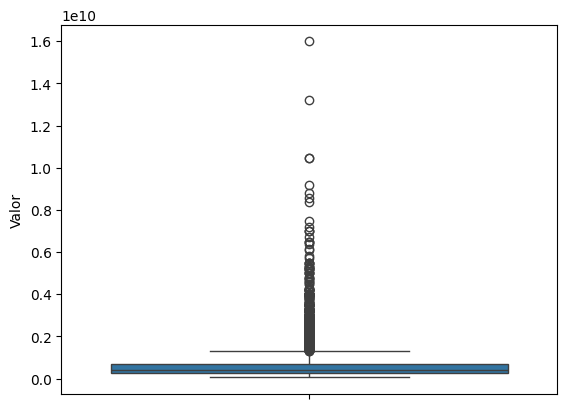

In [168]:
sns.boxplot(df_copy["Valor"])

<Axes: ylabel='Área'>

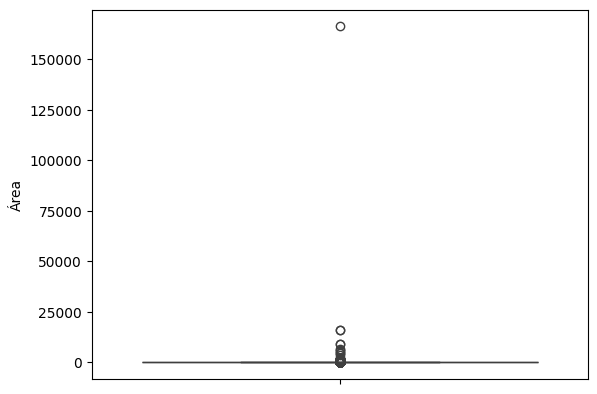

In [169]:
sns.boxplot(df_copy["Área"])

In [170]:
# Z-score

df_zcore = df_copy.copy()
media = df_zcore["Valor"].mean()
desviacion_estandar = df_zcore["Valor"].std()

df_zcore["z_score"]= (df_zcore["Valor"] - media) / desviacion_estandar

outliers_zscore = df_zcore[df_zcore["z_score"].abs()> 3]
outliers_zscore

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,z_score
22,Casa,Casa en venta en Zona Noroccidental,3,5,365,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,2799000000,3.117984
649,Casa,Casa en venta en Usaquén,4,5,389,Usaquén,Usaquén,2900000000,3.261327
657,Apartamento,Apartamento en venta en Chapinero,3,5,427,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,3500000000,4.112871
810,Casa,Casa en venta en El Chicó,5,5,457,El Chicó,CHAPINERO: Chicó Lago + El Refugio,3500000000,4.112871
1071,Apartamento,Apartamento en venta en Chico Reservado,4,4,343,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,4200000000,5.106340
...,...,...,...,...,...,...,...,...,...
9339,Casa,Casa en venta en Usaquén,4,4,526,Usaquén,Usaquén,3500000000,4.112871
9409,Casa,Casa en venta en Usaquén,6,5,400,Usaquén,Usaquén,2800000000,3.119403
9442,Apartamento,Apartamento en venta en Suba,4,5,346,Suba,Suba,2990000000,3.389059
9495,Apartamento,Apartamento en venta en Chapinero,4,4,366,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,3950000000,4.751530


In [171]:
df_zcore = df_copy.copy()
media = df_zcore["Área"].mean()
desviacion_estandar = df_zcore["Área"].std()

df_zcore["z_score"]= (df_zcore["Área"] - media) / desviacion_estandar

outliers_zscore = df_zcore[df_zcore["z_score"].abs()> 3]
outliers_zscore

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,z_score
1037,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,5458,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,178000000,3.067690
1860,Apartamento,Apartamento en venta en Barrios Unidos,3,2,6267,Barrios Unidos,Los Andes,143000000,3.534947
2279,Finca,Finca en venta en Barrios Unidos,6,6,8884,Barrios Unidos,Los Andes,1000000000,5.046458
3807,Apartamento,Apartamento en venta en Chapinero,3,5,15920,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,1250000000,9.110270
4697,Finca,Finca en venta en Barrios Unidos,6,6,8884,Barrios Unidos,Los Andes,1000000000,5.046458
6388,Apartamento,Apartamento en venta en Chapinero,3,5,15920,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,1250000000,9.110270
7073,Casa,Casa en venta en Modelia,4,3,166243,Modelia,Fontibón,850000000,95.932939
9026,Casa,Casa en venta en Usaquén,3,4,6364,Usaquén,Usaquén,3000000000,3.590972


## Normalización de Datos

In [172]:
scaler = StandardScaler()
df_copy["Valor"] = scaler.fit_transform(df_copy[["Valor"]])
df_copy["Área"] = scaler.fit_transform(df_copy[["Área"]])
df_copy

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,-0.044282,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,-0.343563
1,Casa,Casa en venta en Castilla,4,3,0.013479,Castilla,KENNEDY: Castilla + Bavaria,0.096425
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,-0.001539,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,0.735117
3,Apartamento,Apartamento en venta en Usaquén,3,2,0.004237,Usaquén,Usaquén,0.408674
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,-0.010781,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,0.522220
...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,-0.044282,Kennedy,Kennedy Central,-0.442915
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,-0.026954,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,0.096425
9517,Local,Local en venta en Restrepo,8,6,0.136508,Restrepo,Restrepo,0.422867
9518,Casa,Casa en venta en Engativa,3,2,0.020987,Engativa,Engativá,-0.379046


##Codificación de Categorias


In [173]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   object 
 1   Descripcion   9520 non-null   object 
 2   Habitaciones  9520 non-null   int64  
 3   Baños         9520 non-null   int64  
 4   Área          9520 non-null   float64
 5   Barrio        9520 non-null   object 
 6   UPZ           9520 non-null   object 
 7   Valor         9520 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 595.1+ KB


In [174]:
df_copy["Tipo"].value_counts()

,count
Tipo,
Apartamento,7327
Casa,2043
Oficina/Consultorio,60
Local,38
Edificio,22
Bodega,13
Finca,11
Lote,6


In [175]:
#Transformar Columna "Tipo" a valor numerico

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Tipo' column, replacing the original column
df_copy['Tipo'] = label_encoder.fit_transform(df_copy['Tipo'])

# Display the updated DataFrame info to show the data type change
display(df_copy.info())
display(df_copy.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   int64  
 1   Descripcion   9520 non-null   object 
 2   Habitaciones  9520 non-null   int64  
 3   Baños         9520 non-null   int64  
 4   Área          9520 non-null   float64
 5   Barrio        9520 non-null   object 
 6   UPZ           9520 non-null   object 
 7   Valor         9520 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 595.1+ KB


None

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
3011,2,Casa en venta en Santa Ana,4,5,0.144595,Santa Ana,Usaquén,3.971156
2968,0,Apartamento en venta en El Chicó,2,3,-0.031575,El Chicó,CHAPINERO: Chicó Lago + El Refugio,0.366095
619,0,Apartamento en venta en Bosa,3,1,-0.054101,Bosa,Bosa Central,-0.652974
1541,2,Casa en venta en La Estancia,3,2,-0.047170,La Estancia,CIUDAD BOLÍVAR: Monteblanco + El Tesoro + El M...,-0.613233
3038,0,Apartamento en venta en Zona Noroccidental,3,2,-0.039661,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,-0.360595


In [176]:
# Start with a fresh copy of the DataFrame from the original df
df_copy = df.copy()

# Rename columns
columnas = {'Baños': 'Banos', 'Área': 'Area'}
df_copy = df_copy.rename(columns=columnas)

# Impute missing values in 'UPZ'
df_copy["UPZ"] = df_copy["UPZ"].fillna(df_copy["UPZ"].mode()[0])

# Clean and convert 'Valor' to numeric
df_copy['Valor'] = df_copy['Valor'].astype(str).str.replace('[$.]', '', regex=True)
df_copy['Valor'] = pd.to_numeric(df_copy['Valor'])

# Scale numerical features
scaler = StandardScaler()
df_copy["Valor"] = scaler.fit_transform(df_copy[["Valor"]])
df_copy["Area"] = scaler.fit_transform(df_copy[["Area"]])


# Apply One-Hot Encoding to the "Barrio" column
df_copy = pd.get_dummies(df_copy, columns=['Barrio'], drop_first=True)

#Transformar Columna "Tipo" a valor numerico
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Tipo' column, replacing the original column
df_copy['Tipo'] = label_encoder.fit_transform(df_copy['Tipo'])

# Drop the original 'Descripcion' and 'UPZ' columns as they are no longer needed
df_copy = df_copy.drop(['Descripcion', 'UPZ'], axis=1)


# Display the head and info of the updated DataFrame
display(df_copy.head())
display(df_copy.info())

,Tipo,Habitaciones,Banos,Area,Valor,Barrio_Alhambra,Barrio_Andes Norte,Barrio_Antonio Nariño,Barrio_Barrancas,Barrio_Barrios Unidos,...,Barrio_Usme,Barrio_Venecia,Barrio_Veraguas,Barrio_Verbenal,Barrio_Villa Alsacia,Barrio_Villa Maria,Barrio_Villas De Granada,Barrio_Villemar,Barrio_Zona Franca,Barrio_Zona Noroccidental
0,0,3,2,-0.044282,-0.343563,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,4,3,0.013479,0.096425,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,3,3,-0.001539,0.735117,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,3,2,0.004237,0.408674,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,3,-0.010781,0.522220,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Columns: 153 entries, Tipo to Barrio_Zona Noroccidental
dtypes: bool(148), float64(2), int64(3)
memory usage: 1.7 MB


None

In [177]:
df_final = df_copy[["Tipo", "Habitaciones", "Banos", "Area", "Valor",]]
df_final

,Tipo,Habitaciones,Banos,Area,Valor
0,0,3,2,-0.044282,-0.343563
1,2,4,3,0.013479,0.096425
2,0,3,3,-0.001539,0.735117
3,0,3,2,0.004237,0.408674
4,0,2,3,-0.010781,0.522220
...,...,...,...,...,...
9515,0,3,2,-0.044282,-0.442915
9516,0,2,2,-0.026954,0.096425
9517,5,8,6,0.136508,0.422867
9518,2,3,2,0.020987,-0.379046


In [178]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   int64  
 1   Habitaciones  9520 non-null   int64  
 2   Banos         9520 non-null   int64  
 3   Area          9520 non-null   float64
 4   Valor         9520 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 372.0 KB


#Regresion Lineal

In [184]:
# Start with a fresh copy of the DataFrame
df_model = df.copy()

# Rename columns
columnas = {'Baños': 'Banos', 'Área': 'Area'}
df_model = df_model.rename(columns=columnas)

# Impute missing values in 'UPZ'
df_model["UPZ"] = df_model["UPZ"].fillna(df_model["UPZ"].mode()[0])

# Create the 'UPZ_Abreviada' column
df_model['UPZ_Abreviada'] = df_model['UPZ'].astype(str).apply(lambda x: x.split(':')[0] if ':' in x else x).str.capitalize()

# Clean and convert 'Valor' to numeric
df_model['Valor'] = df_model['Valor'].astype(str).str.replace('[$.]', '', regex=True)
df_model['Valor'] = pd.to_numeric(df_model['Valor'])

# Scale numerical features
scaler = StandardScaler()
df_model["Valor"] = scaler.fit_transform(df_model[["Valor"]])
df_model["Area"] = scaler.fit_transform(df_model[["Area"]])
# No need to scale Habitaciones and Banos if we treat them as counts,


UPZ_1 = df_model["UPZ_Abreviada"].value_counts()
print(UPZ_1)
# Apply One-Hot Encoding to 'Tipo', 'UPZ_Abreviada', and 'Barrio'
df_model = pd.get_dummies(df_model, columns=['Tipo', 'UPZ_Abreviada', 'Barrio'], drop_first=True)

# Drop the original 'Descripcion' and 'UPZ' columns as they are no longer needed
df_model = df_model.drop(['Descripcion', 'UPZ'], axis=1)

# Display the head and info of the prepared DataFrame
display(df_model.head())
display(df_model.info())

UPZ_Abreviada
Usaquén                      2494
Chapinero                    1831
Bosa central                  591
Kennedy central               589
Engativá                      512
Suba                          501
Los andes                     473
Fontibón                      328
Teusaquillo                   277
La alhambra                   180
Santa fe                      145
Puente aranda                 116
Tintala                       112
Britalia                      112
Ciudad bolívar                103
Niza                           87
El prado                       78
Garcés navas                   76
Kennedy                        68
Los alcázares                  68
Ciudad salitre oriental        60
Restrepo                       58
Usme                           51
Los cedros                     50
El rincón                      47
Localidad chapinero resto      46
La sabana                      46
La candelaria                  40
Sosiego                        40


,Habitaciones,Banos,Area,Valor,Tipo_Bodega,Tipo_Casa,Tipo_Edificio,Tipo_Finca,Tipo_Local,Tipo_Lote,...,Barrio_Usme,Barrio_Venecia,Barrio_Veraguas,Barrio_Verbenal,Barrio_Villa Alsacia,Barrio_Villa Maria,Barrio_Villas De Granada,Barrio_Villemar,Barrio_Zona Franca,Barrio_Zona Noroccidental
0,3,2,-0.044282,-0.343563,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,4,3,0.013479,0.096425,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,3,-0.001539,0.735117,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2,0.004237,0.408674,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,3,-0.010781,0.522220,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Columns: 217 entries, Habitaciones to Barrio_Zona Noroccidental
dtypes: bool(213), float64(2), int64(2)
memory usage: 2.2 MB


None

In [185]:
# Separate features (X) and target (y)
x = df_model.drop("Valor", axis=1)
y = df_model["Valor"]

In [186]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7616, 216)
Shape of X_test: (1904, 216)
Shape of y_train: (7616,)
Shape of y_test: (1904,)


In [187]:
# Create and train the Linear Regression model
linear_model_full = LinearRegression()
linear_model_full.fit(X_train, y_train)

LinearRegression()

In [188]:
# Make predictions on the test set
y_pred_full = linear_model_full.predict(X_test)

# Display predictions
display(y_pred_full)

array([ 0.32417724, -0.8257656 ,  0.88779625, ..., -0.72287221,
       -0.35272487, -0.33775793])

In [189]:
# Evaluate the model
mae_full = mean_absolute_error(y_test, y_pred_full)
mse_full = mean_squared_error(y_test, y_pred_full)
r2_full = r2_score(y_test, y_pred_full)

print("Model Evaluation (including Barrio and UPZ):")
print(f"  MAE: {mae_full}")
print(f"  MSE: {mse_full}")
print(f"  R2 : {r2_full}")

Model Evaluation (including Barrio and UPZ):
  MAE: 0.3899811958862948
  MSE: 0.7389610146088447
  R2 : 0.3623501408450204


In [190]:
from sklearn.metrics import mean_absolute_percentage_error

# Define a threshold for values considered "close to zero"
threshold = 0.1  # Adjust threshold as needed based on your scaled data

# Filter out values in y_test (from the full linear model) that are close to zero
y_test_full_filtered_for_mape = y_test[abs(y_test) > threshold]
y_pred_full_filtered_for_mape = y_pred_full[abs(y_test) > threshold]

# Calculate MAPE on the filtered data for the full linear model
mape_full_filtered = mean_absolute_percentage_error(y_test_full_filtered_for_mape, y_pred_full_filtered_for_mape)

print(f"MAPE for Linear Regression Model (Full) excluding near-zero values: {mape_full_filtered:.4f}")

MAPE for Linear Regression Model (Full) excluding near-zero values: 0.8376


##Evaluación del modelo

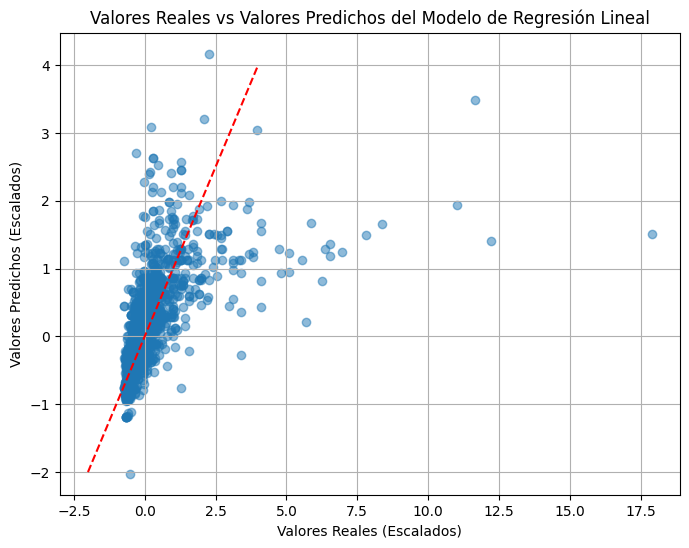

In [191]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_full, alpha=0.5)
plt.plot([-2, 4], [-2, 4], 'r--') # Add a diagonal line representing perfect predictions
plt.xlabel("Valores Reales (Escalados)")
plt.ylabel("Valores Predichos (Escalados)")
plt.title("Valores Reales vs Valores Predichos del Modelo de Regresión Lineal")
plt.grid(True)
plt.show()

## Regresión Polinomica

In [192]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Prepare data (using df_model from previous steps)
# Separate features (X) and target (y)
x = df_model.drop("Valor", axis=1)
y = df_model["Valor"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Select numerical features for polynomial transformation
numerical_features = ['Habitaciones', 'Banos', 'Area']

# Separate numerical and categorical features
X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

X_train_categorical = X_train.drop(columns=numerical_features)
X_test_categorical = X_test.drop(columns=numerical_features)

# Define degrees to evaluate
degrees = [2, 3] # You can add more degrees here if needed

results = {}

for degree in degrees:
    print(f"Training and evaluating polynomial regression model with degree {degree}...")

    # Create polynomial features for numerical features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly_numerical = poly_features.fit_transform(X_train_numerical)
    X_test_poly_numerical = poly_features.transform(X_test_numerical)

    # Convert polynomial features back to DataFrame
    X_train_poly_numerical_df = pd.DataFrame(X_train_poly_numerical, index=X_train.index, columns=poly_features.get_feature_names_out(numerical_features))
    X_test_poly_numerical_df = pd.DataFrame(X_test_poly_numerical, index=X_test.index, columns=poly_features.get_feature_names_out(numerical_features))

    # Combine polynomial numerical features with original categorical features
    X_train_poly = pd.concat([X_train_poly_numerical_df, X_train_categorical], axis=1)
    X_test_poly = pd.concat([X_test_poly_numerical_df, X_test_categorical], axis=1)

    # Train the Linear Regression model
    linear_model_poly = LinearRegression()
    linear_model_poly.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred_poly = linear_model_poly.predict(X_test_poly)

    # Evaluate the model
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    results[degree] = {'MAE': mae_poly, 'MSE': mse_poly, 'R2': r2_poly}

    print(f"Model with degree {degree} evaluated.")

# Print the results for all degrees
print("\n--- Polynomial Regression Model Evaluation Results ---")
for degree, metrics in results.items():
    print(f"Degree {degree}:")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R2 : {metrics['R2']}")
    print("-" * 20)

Training and evaluating polynomial regression model with degree 2...
Model with degree 2 evaluated.
Training and evaluating polynomial regression model with degree 3...
Model with degree 3 evaluated.

--- Polynomial Regression Model Evaluation Results ---
Degree 2:
  MAE: 0.3449490755297871
  MSE: 0.6140800775737222
  R2 : 0.47010996895143087
--------------------
Degree 3:
  MAE: 0.27063472808510713
  MSE: 0.4157332093764129
  R2 : 0.6412635887899458
--------------------


## Regresión Lineal con valores Log

In [214]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Start with a fresh copy of the DataFrame from the original df
# Assuming df is the original dataframe loaded from the CSV
df_log_transform = df.copy()

# Rename columns
columnas = {'Baños': 'Banos', 'Área': 'Area'}
df_log_transform = df_log_transform.rename(columns=columnas)

# Impute missing values in 'UPZ'
df_log_transform["UPZ"] = df_log_transform["UPZ"].fillna(df_log_transform["UPZ"].mode()[0])

# Clean and convert 'Valor' to numeric
df_log_transform['Valor'] = df_log_transform['Valor'].astype(str).str.replace('[$.]', '', regex=True)
df_log_transform['Valor'] = pd.to_numeric(df_log_transform['Valor'])

# Apply logarithmic transformation to 'Area' and 'Valor'
# Add a small constant (e.g., 1) to handle potential zero values before taking the log
df_log_transform['Area_log'] = np.log1p(df_log_transform['Area'])
df_log_transform['Valor_log'] = np.log1p(df_log_transform['Valor'])

# Apply One-Hot Encoding to 'Tipo', 'UPZ_Abreviada', and 'Barrio'
# Create the 'UPZ_Abreviada' column before one-hot encoding
df_log_transform['UPZ_Abreviada'] = df_log_transform['UPZ'].astype(str).apply(lambda x: x.split(':')[0] if ':' in x else x).str.capitalize()

df_log_transform = pd.get_dummies(df_log_transform, columns=['Tipo', 'UPZ_Abreviada', 'Barrio'], drop_first=True)

# Drop the original 'Descripcion', 'UPZ', 'Area', and 'Valor' columns
df_log_transform = df_log_transform.drop(['Descripcion', 'UPZ', 'Area', 'Valor'], axis=1)

# Define features (X) and target (y) using the log-transformed value
x_log = df_log_transform.drop("Valor_log", axis=1)
y_log = df_log_transform["Valor_log"]

# Split data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(x_log, y_log, test_size=0.2, random_state=42)

# Create and train the Linear Regression model on the log-transformed data
linear_model_log = LinearRegression()
linear_model_log.fit(X_train_log, y_train_log)

# Make predictions on the test set
y_pred_log = linear_model_log.predict(X_test_log)

# Evaluate the model
mae_log = mean_absolute_error(y_test_log, y_pred_log)
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

print("--- Linear Regression Model Evaluation Results (Log Transformed Values) ---")
print(f"  MAE: {mae_log}")
print(f"  MSE: {mse_log}")
print(f"  R2 : {r2_log}")
print("-" * 20)

--- Linear Regression Model Evaluation Results (Log Transformed Values) ---
  MAE: 0.22179149522346342
  MSE: 0.09507355480879356
  R2 : 0.8410428833328888
--------------------


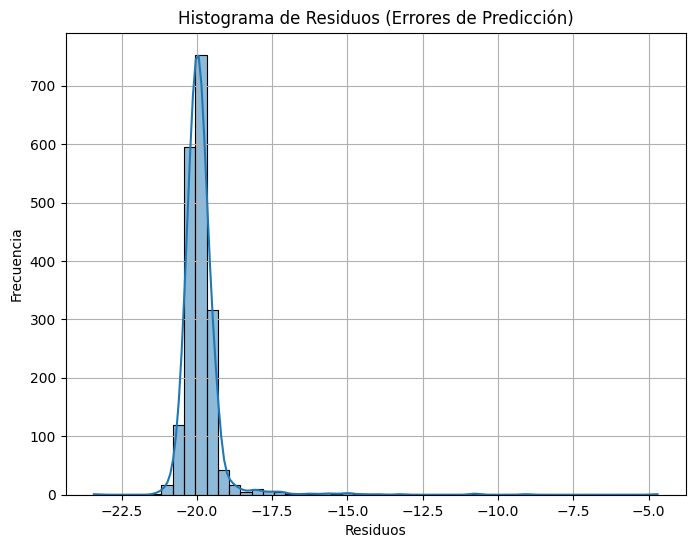

In [194]:
# Calculate the residuals (errors)
residuals = y_test - y_pred_log

# Create a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Histograma de Residuos (Errores de Predicción)")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [195]:
# Calculate the mean and standard deviation of the residuals
mean_residuals = residuals.mean()
std_residuals = residuals.std()

print(f"Media de los residuos: {mean_residuals:.4f}")
print(f"Desviación estándar de los residuos: {std_residuals:.4f}")

Media de los residuos: -19.8708
Desviación estándar de los residuos: 0.7845


In [196]:
df =pd.read_csv("/content/inmuebles_bogota.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


# Regresión Logistica

In [221]:
import pandas as pd
import numpy as np

# Asumimos que ya tienes df con columnas: tipo, habitaciones, banos, area, barrio, upz
# y que ya hiciste las conversiones numéricas y el mapeo 'rea' -> 'area' si aplica.

# --- 1) Subconjunto binario (Casa vs Apartamento) ---
df_bin = df[df["Tipo"].isin(["Casa", "Apartamento"])].copy()

# ==============================
# Opción A: SUBMUESTREO (undersampling)
# ==============================
def undersample_equal(df_in, label_col="Tipo", classes=("Casa", "Apartamento"), random_state=42):
    df_in = df_in[df_in[label_col].isin(classes)].copy()
    n = df_in[label_col].value_counts().min()  # tamaño objetivo (clase minoritaria)
    balanced = []
    for c in classes:
        balanced.append(
            df_in[df_in[label_col] == c].sample(n, random_state=random_state, replace=False)
        )
    df_bal = pd.concat(balanced, axis=0).sample(frac=1, random_state=random_state).reset_index(drop=True)
    return df_bal

df_bal_under = undersample_equal(df_bin, label_col="Tipo", classes=("Casa","Apartamento"), random_state=42)
print("Undersampling -> Conteos por clase:")
print(df_bal_under["Tipo"].value_counts())

# ==============================
# Opción B: SOBREMUESTREO (oversampling)
# ==============================
def oversample_equal(df_in, label_col="Tipo", classes=("Casa","Apartamento"), random_state=42):
    df_in = df_in[df_in[label_col].isin(classes)].copy()
    n = df_in[label_col].value_counts().max()  # tamaño objetivo (clase mayoritaria)
    def upsample(g):
        return g.sample(n, replace=True, random_state=random_state)
    df_bal = (df_in.groupby(label_col, group_keys=False)
                    .apply(upsample)
                    .sample(frac=1, random_state=random_state)
                    .reset_index(drop=True))
    return df_bal

df_bal_over = oversample_equal(df_bin, label_col="Tipo", classes=("Casa","Apartamento"), random_state=42)
print("\nOversampling -> Conteos por clase:")
print(df_bal_over["Tipo"].value_counts())


Undersampling -> Conteos por clase:
Tipo
Casa           2043
Apartamento    2043
Name: count, dtype: int64

Oversampling -> Conteos por clase:
Tipo
Casa           7327
Apartamento    7327
Name: count, dtype: int64


/tmp/ipython-input-4027577990.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(upsample)



Clases después de undersampling:
tipo_std
Casa           2043
Apartamento    2043
Name: count, dtype: int64

=== Classification Report (Casa=1, Apto=0) ===
              precision    recall  f1-score   support

           0     0.7515    0.9315    0.8319       409
           1     0.9100    0.6919    0.7861       409

    accuracy                         0.8117       818
   macro avg     0.8307    0.8117    0.8090       818
weighted avg     0.8307    0.8117    0.8090       818


Matriz de Confusión (array):
 [[381  28]
 [126 283]]

ROC AUC: 0.8680


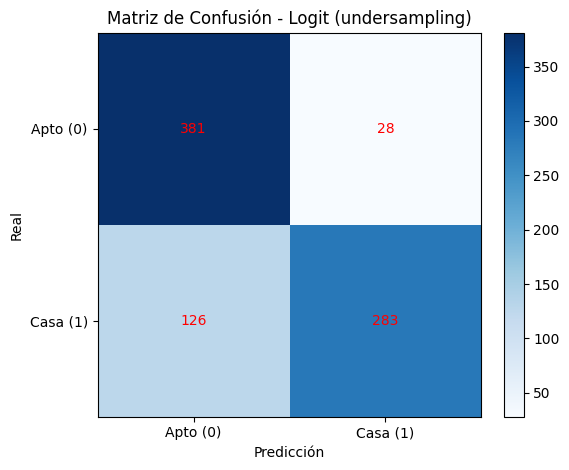

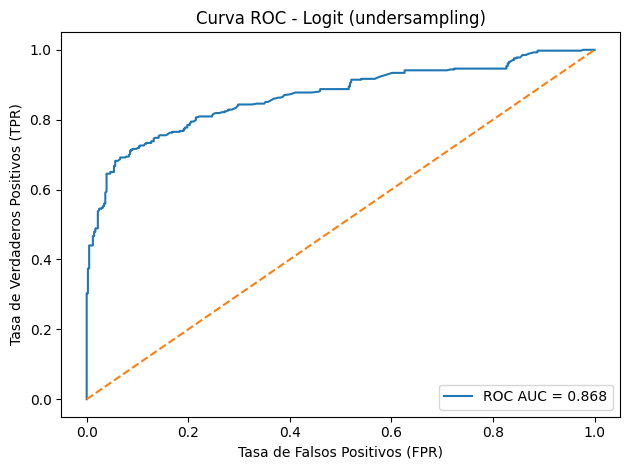

In [230]:
# ============================================
# Flujo completo: Normalizar -> Undersampling
# ============================================

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# ------------------ 0) Cargar dataset ------------------
CSV_PATH = "/content/inmuebles_bogota.csv"  # cámbialo si lo corres local
df = pd.read_csv(CSV_PATH, encoding="utf-8", engine="python")

# Normalizar nombres de columnas
def normalize_col(s):
    s = s.strip()
    s = s.replace("Ã¡","a").replace("Ã©","e").replace("Ã­","i").replace("Ã³","o").replace("Ãº","u").replace("Ã±","n").replace("Ñ","N")
    s = s.replace("á","a").replace("é","e").replace("í","i").replace("ó","o").replace("ú","u").replace("ñ","n").replace("Ñ","N")
    s = re.sub(r"[^A-Za-z0-9]+","_", s)
    s = re.sub(r"_+","_", s).strip("_").lower()
    return s

df.columns = [normalize_col(c) for c in df.columns]

# 'área' puede estar como 'rea'
if "rea" in df.columns and "area" not in df.columns:
    df["area"] = pd.to_numeric(df["rea"], errors="coerce")

# ------------------ 1) Normalizar variables ------------------
for c in ["area","habitaciones","banos"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Normalizar texto de tipo
def normalize_text(s: str) -> str:
    s = str(s).strip()
    s = (s.replace("Á","A").replace("É","E").replace("Í","I").replace("Ó","O").replace("Ú","U")
           .replace("á","a").replace("é","e").replace("í","i").replace("ó","o").replace("ú","u")
           .replace("ñ","n").replace("Ñ","N"))
    s = re.sub(r"\s+"," ", s)
    return s.lower()

df["tipo_norm"] = df["tipo"].apply(normalize_text)

map_dict = {
    "casa": "Casa",
    "casas": "Casa",
    "apartamento": "Apartamento",
    "apartamentos": "Apartamento",
    "apto": "Apartamento",
    "apt": "Apartamento",
    "apartaestudio": "Apartamento",
    "apartment": "Apartamento",
    "apartmento": "Apartamento",
}
df["tipo_std"] = df["tipo_norm"].map(map_dict)

# ------------------ 2) Filtrado y balanceo ------------------
df_model = df[df["tipo_std"].isin(["Casa","Apartamento"])].dropna(subset=["area","habitaciones","banos"]).copy()

def undersample_equal(df_in, label_col="tipo_std", classes=("Casa","Apartamento"), random_state=42):
    vc = df_in[label_col].value_counts()
    n = int(vc.loc[list(classes)].min())
    parts = []
    for c in classes:
        parts.append(df_in[df_in[label_col] == c].sample(n=n, random_state=random_state, replace=False))
    return pd.concat(parts, axis=0).sample(frac=1, random_state=random_state).reset_index(drop=True)

df_bal = undersample_equal(df_model)
print("\nClases después de undersampling:")
print(df_bal["tipo_std"].value_counts())

# ------------------ 3) Regresión logística ------------------
X = df_bal[["area","habitaciones","banos"]].copy()
y = (df_bal["tipo_std"] == "Casa").astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)
y_pred  = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

# ------------------ 4) Métricas ------------------
print("\n=== Classification Report (Casa=1, Apto=0) ===")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión (array):\n", cm)

auc = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC: {auc:.4f}")

# ------------------ 5) Gráfica: Matriz de Confusión ------------------
labels = ["Apto (0)", "Casa (1)"]
fig_cm, ax_cm = plt.subplots()
im = ax_cm.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
ax_cm.set_title("Matriz de Confusión - Logit (undersampling)")
ax_cm.set_xlabel("Predicción")
ax_cm.set_ylabel("Real")
ax_cm.set_xticks([0,1]); ax_cm.set_yticks([0,1])
ax_cm.set_xticklabels(labels); ax_cm.set_yticklabels(labels)

# anotar valores
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax_cm.text(j, i, cm[i, j], ha="center", va="center", color="red")

fig_cm.colorbar(im, ax=ax_cm, fraction=0.046, pad=0.04)
fig_cm.tight_layout()
plt.show()

# ------------------ 6) Gráfica: Curva ROC ------------------
fpr, tpr, thr = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Logit (undersampling)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
